# Clustering point cloud data 
**Aim = cluster similar anatomies together to see if we can identify outliers**

In [11]:
#imports
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from sklearn.metrics import silhouette_samples, silhouette_score

#needed for reading in cloud data
import glob
from natsort import natsorted

In [ ]:
#load in data 
#read in cloud data - no aesthectics just geometry 

#intialise an empty matrix
data_matrix = np.empty((10*900,3*18000))
i = 0

#we want to go through each ".npy" file in order
for file in natsorted(glob.glob("../data:/training_data/mixed_samples/*.npy")):

    #make each file in sequence the next row of a matrix
    current_geometry = np.load(file)

    #10 rows for each file (10 timepoints)
    for j in range(0,10):

        #fill the current row of the matrix
        data_matrix[i] = current_geometry[j,:,0:3].flatten()

        #move to next row of the matrix
        i = i + 1

In [ ]:
#finding optimal k value using silhouette score and elbow method

array([-19.19090843,  17.49430275,   9.2532053 , ..., -15.19591618,
       -32.96632385,  55.38721085], shape=(54000,))

For n_clusters = 2 The average silhouette_score is : 0.27400301769460406
For n_clusters = 3 The average silhouette_score is : 0.289835477301193
For n_clusters = 4 The average silhouette_score is : 0.20081209620606646
For n_clusters = 5 The average silhouette_score is : 0.20938191626917171
For n_clusters = 6 The average silhouette_score is : 0.18735915392315353
For n_clusters = 7 The average silhouette_score is : 0.1752490246038093
For n_clusters = 8 The average silhouette_score is : 0.15212432971150944
For n_clusters = 9 The average silhouette_score is : 0.15734441861610135
For n_clusters = 10 The average silhouette_score is : 0.15485178363757612
For n_clusters = 11 The average silhouette_score is : 0.14794752163824107
For n_clusters = 12 The average silhouette_score is : 0.14783374021585674
For n_clusters = 13 The average silhouette_score is : 0.15088299614588407
For n_clusters = 14 The average silhouette_score is : 0.15190443134310808
For n_clusters = 15 The average silhouette_score 

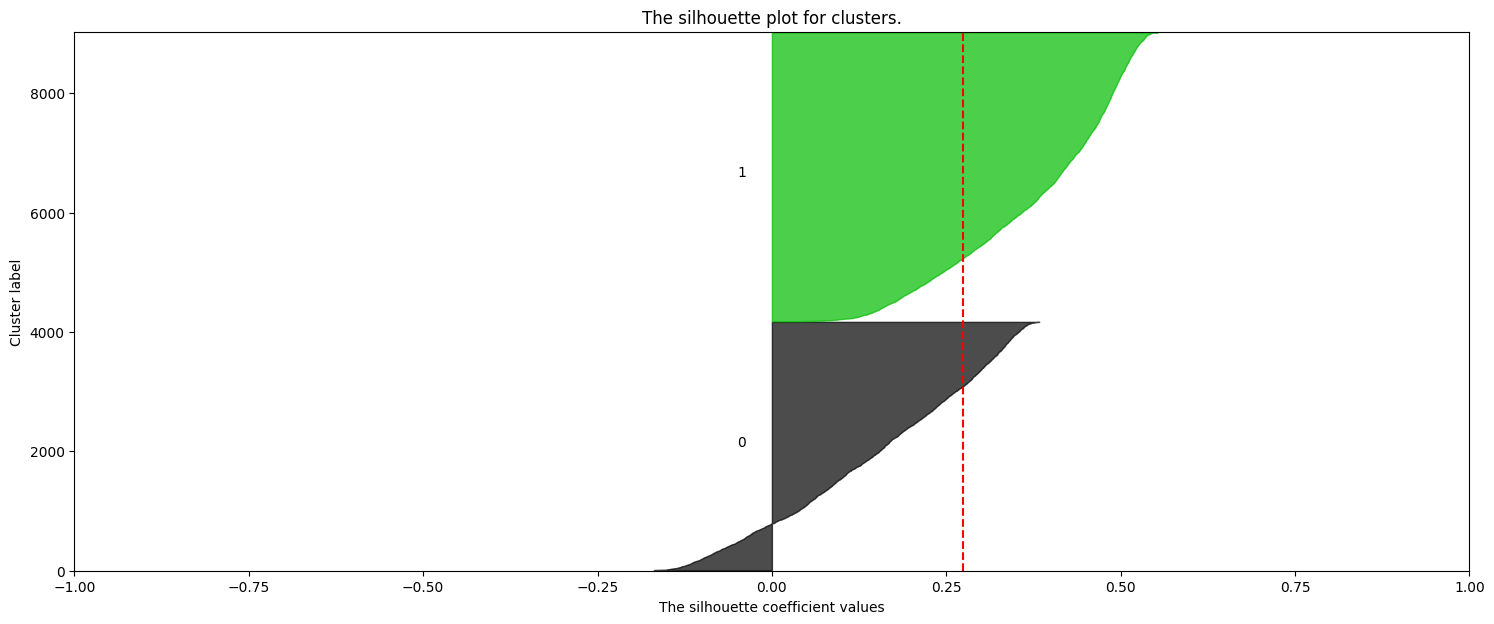

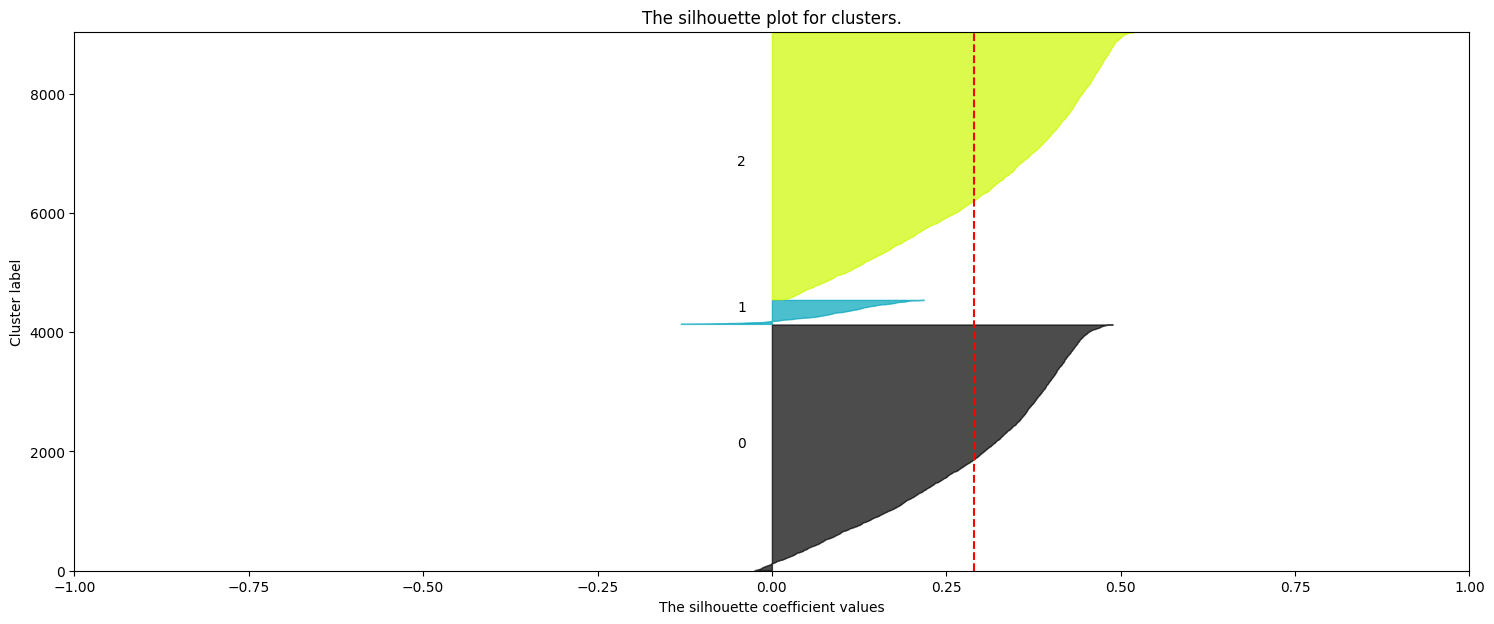

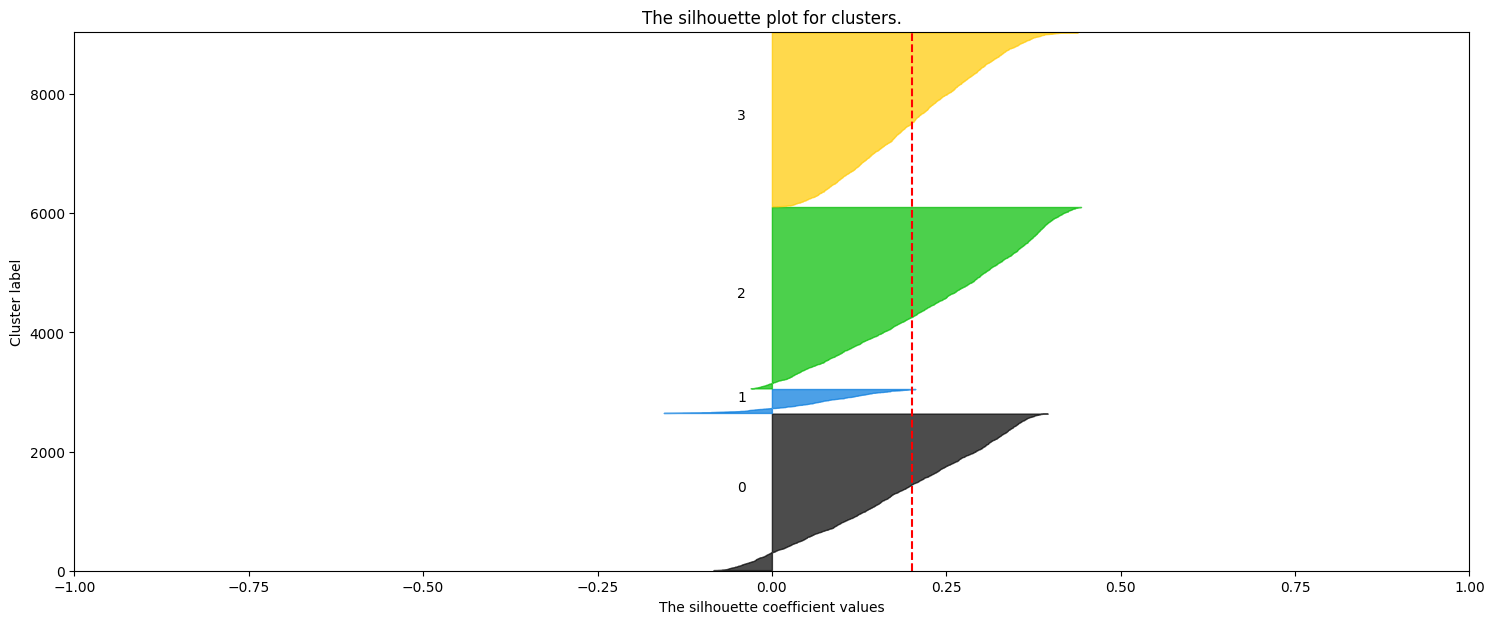

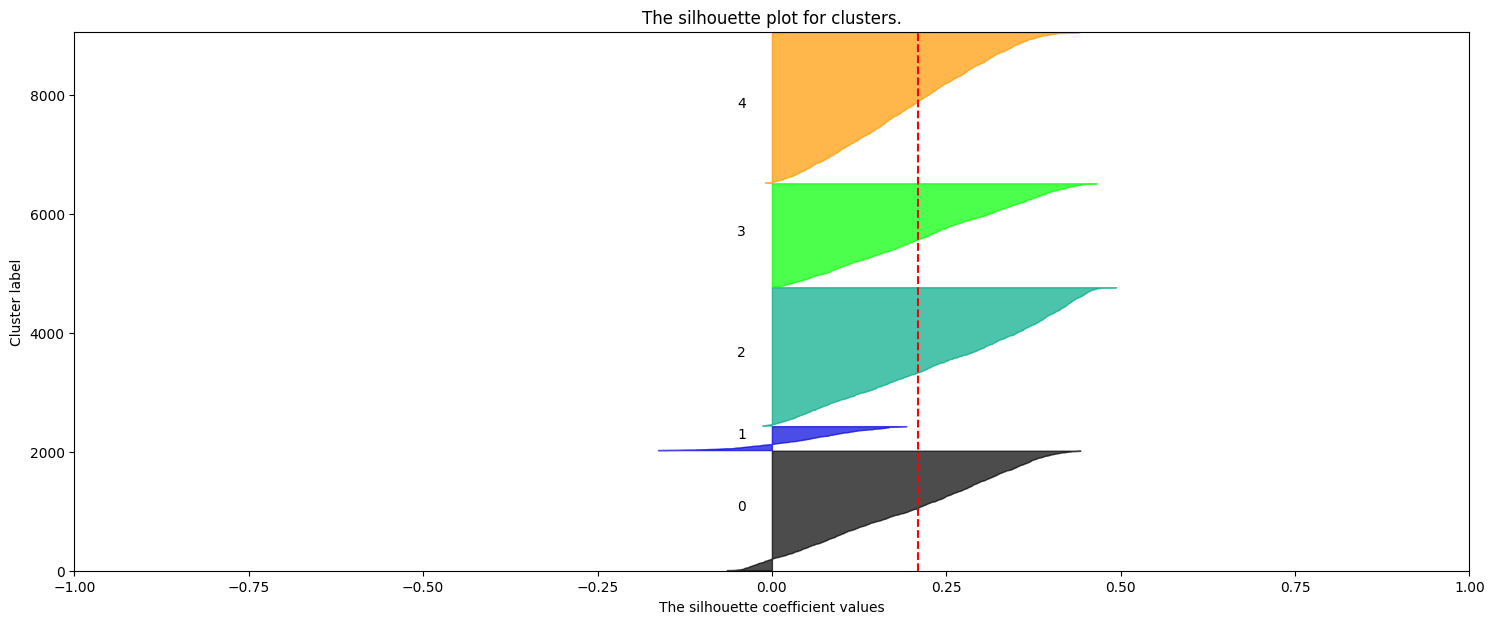

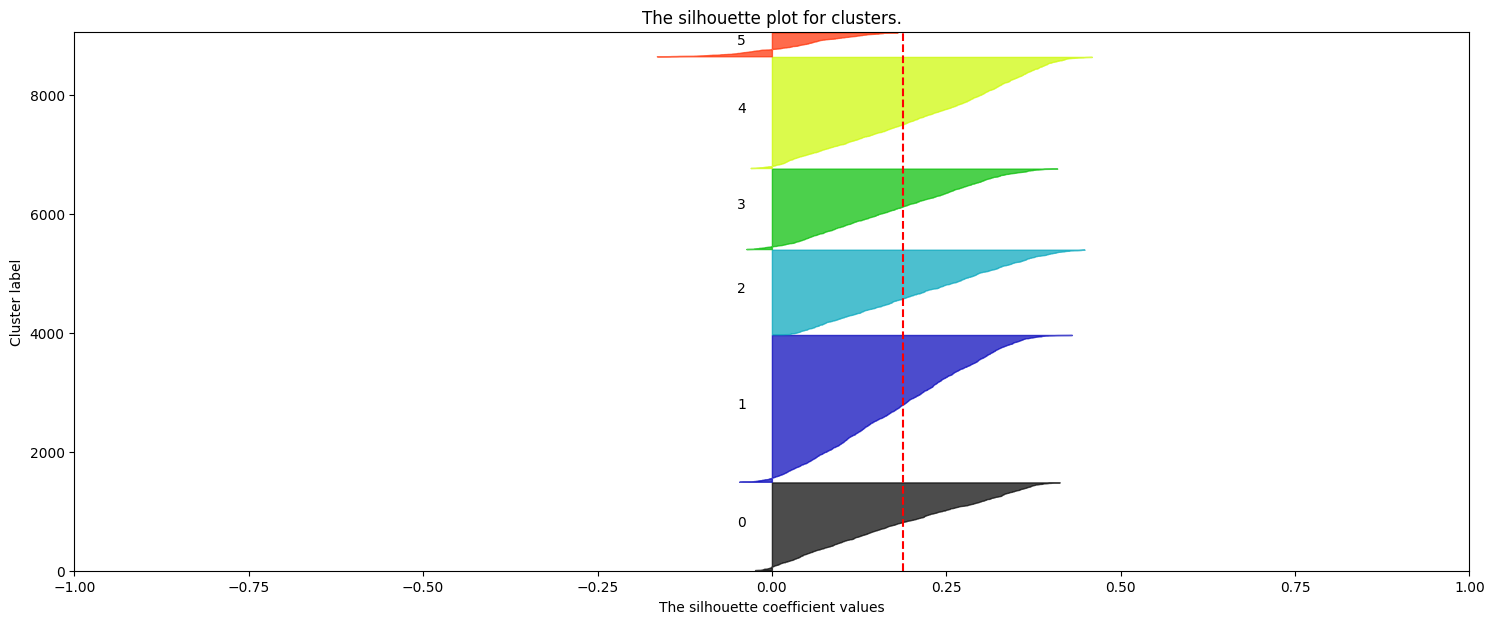

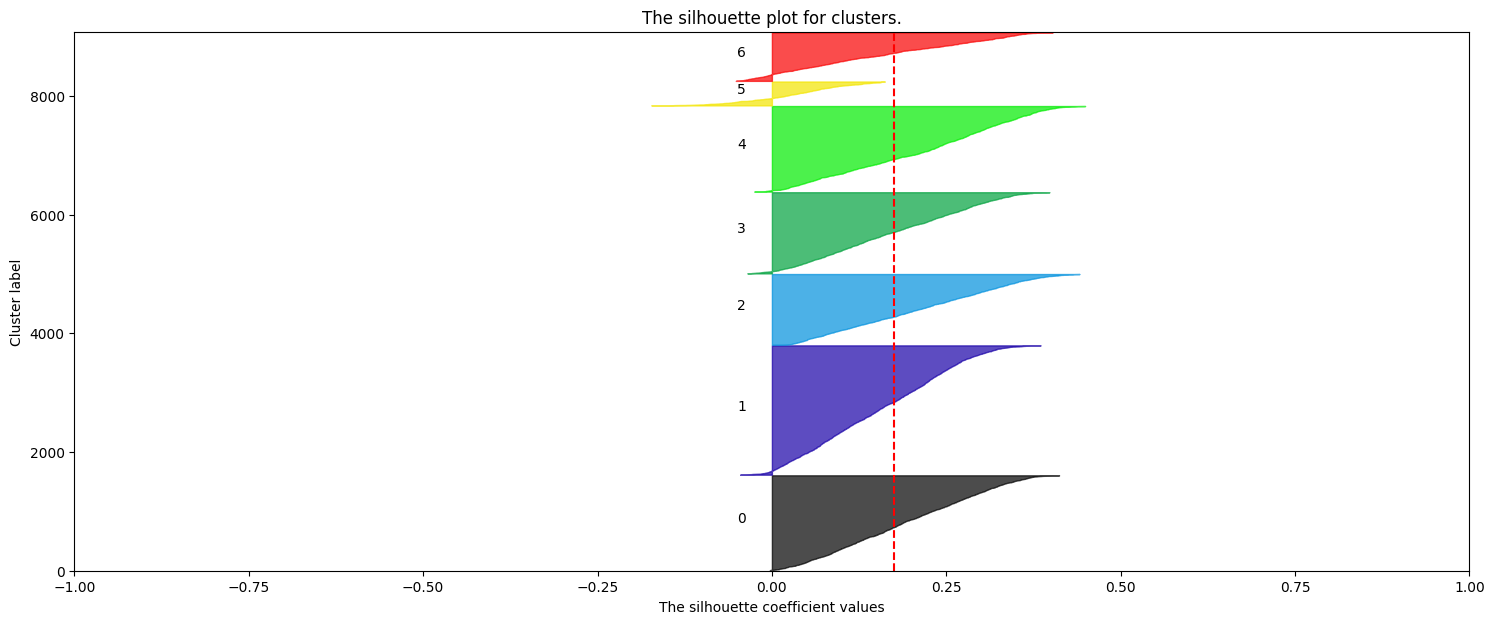

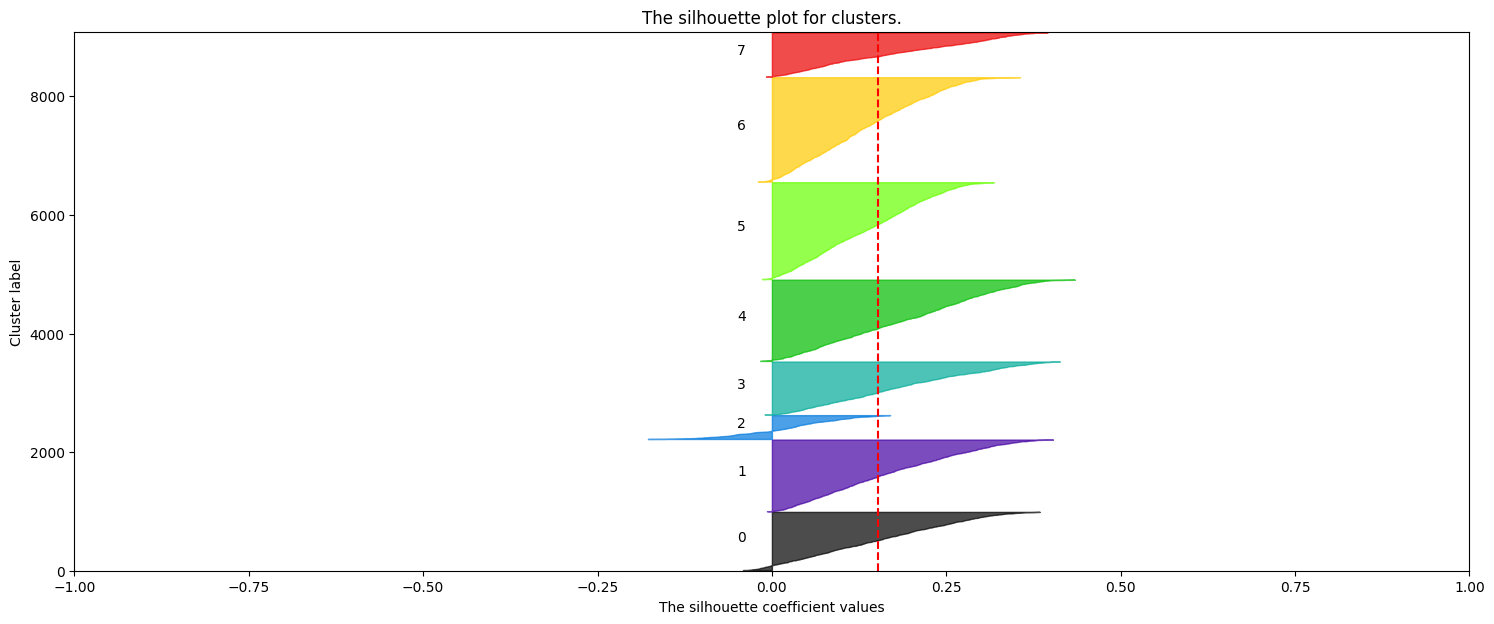

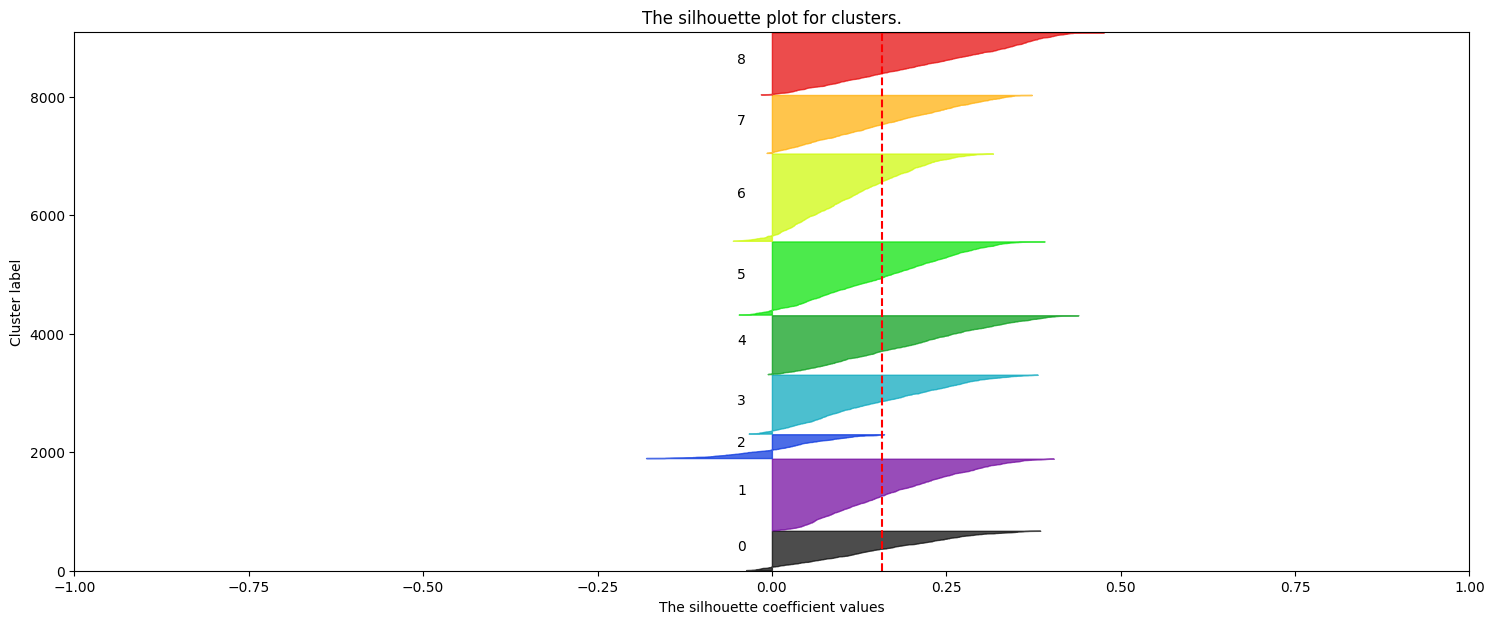

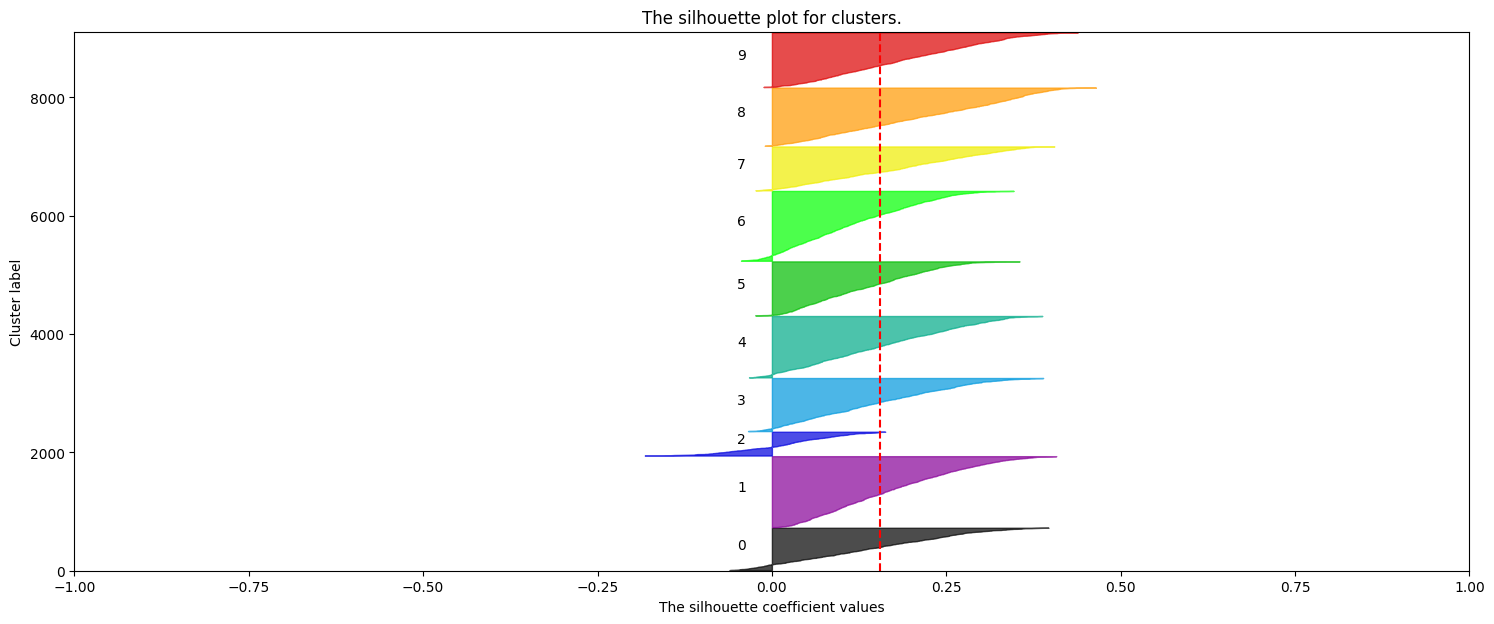

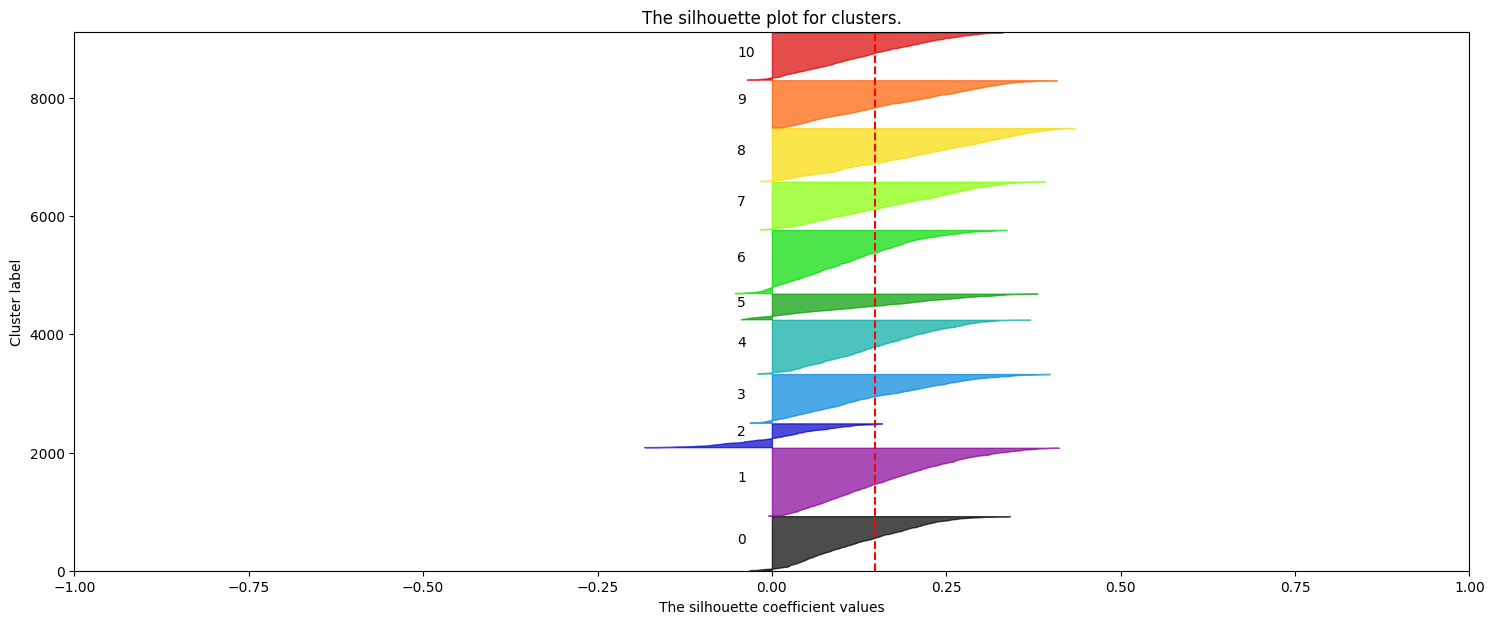

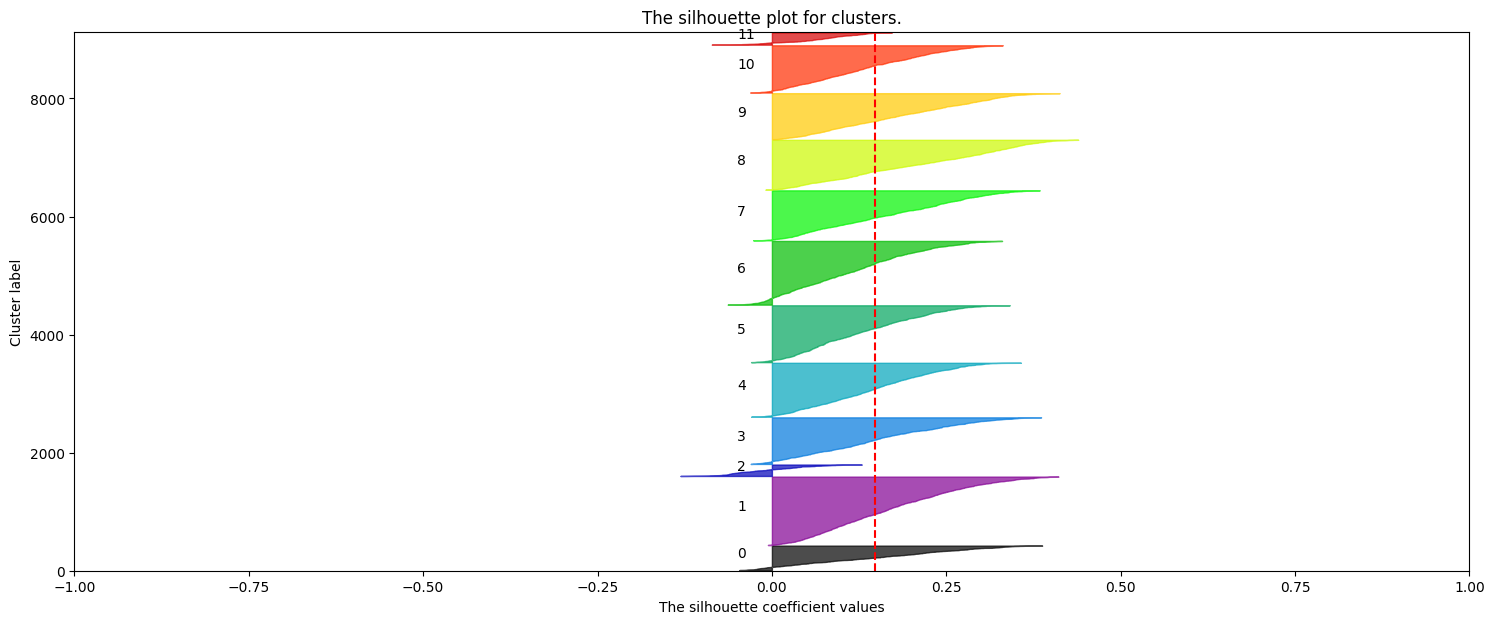

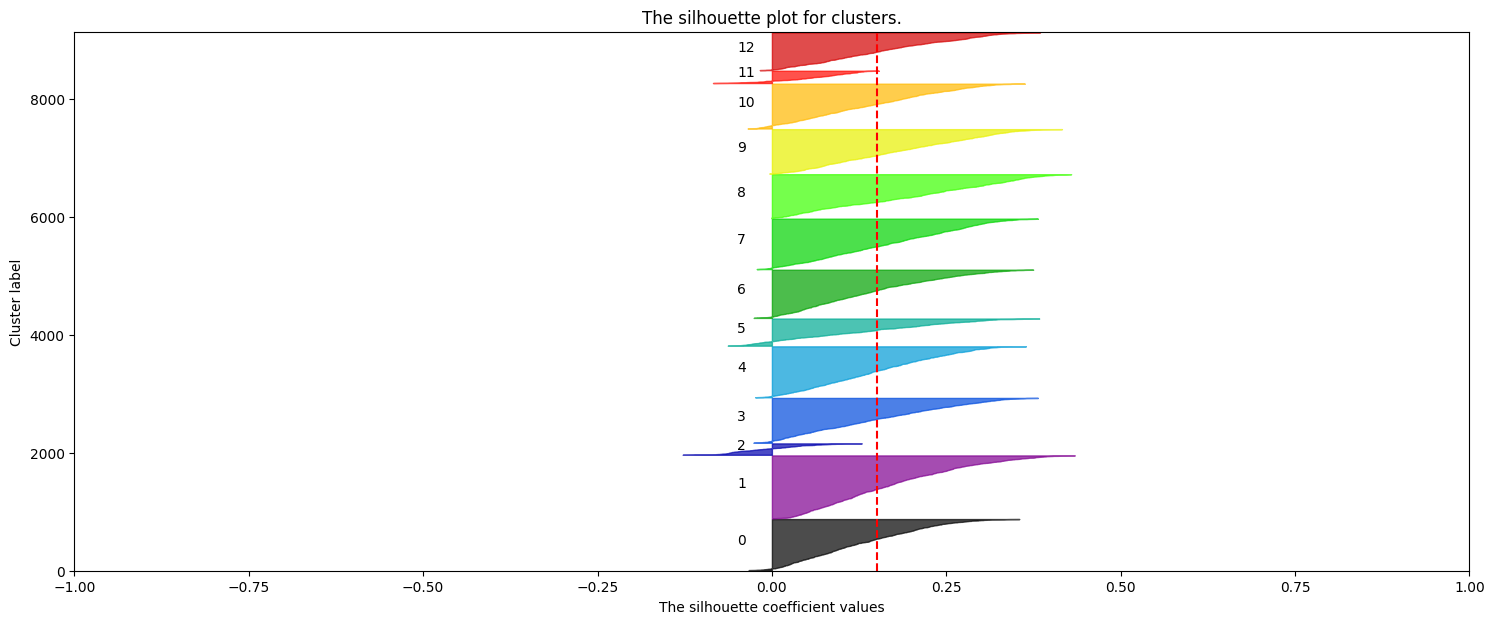

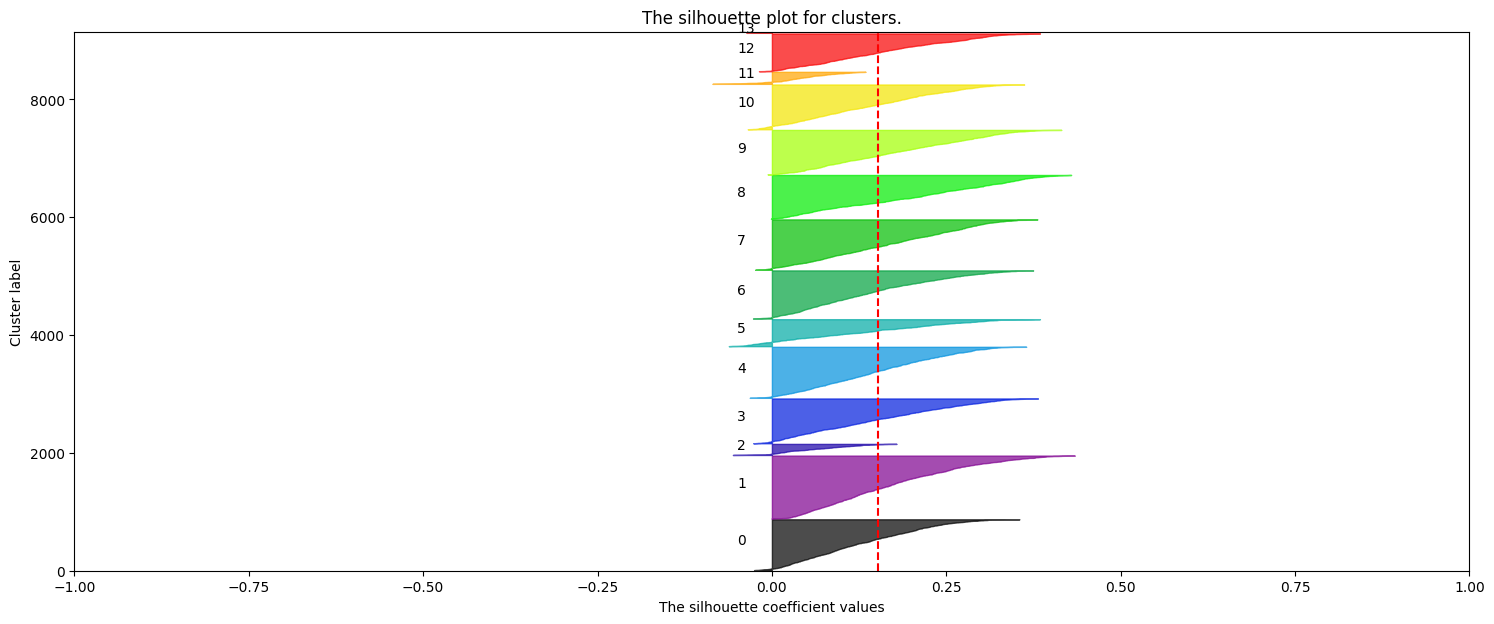

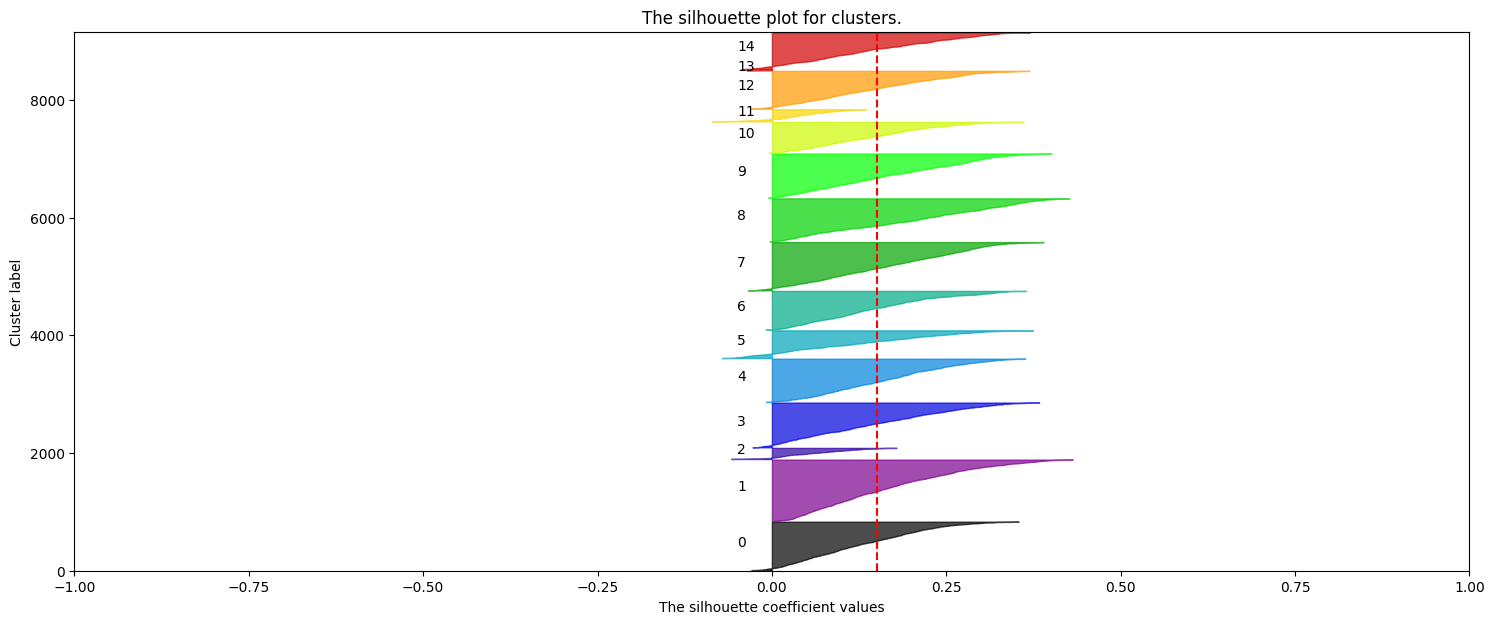

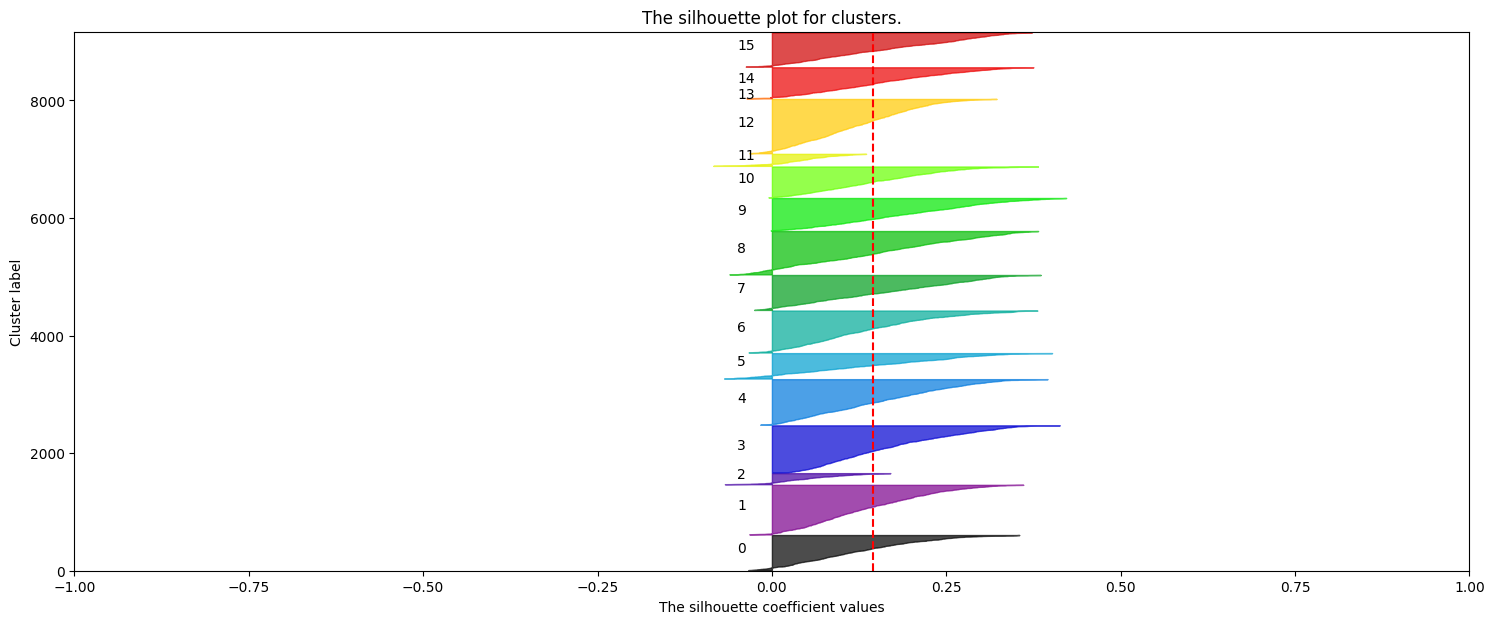

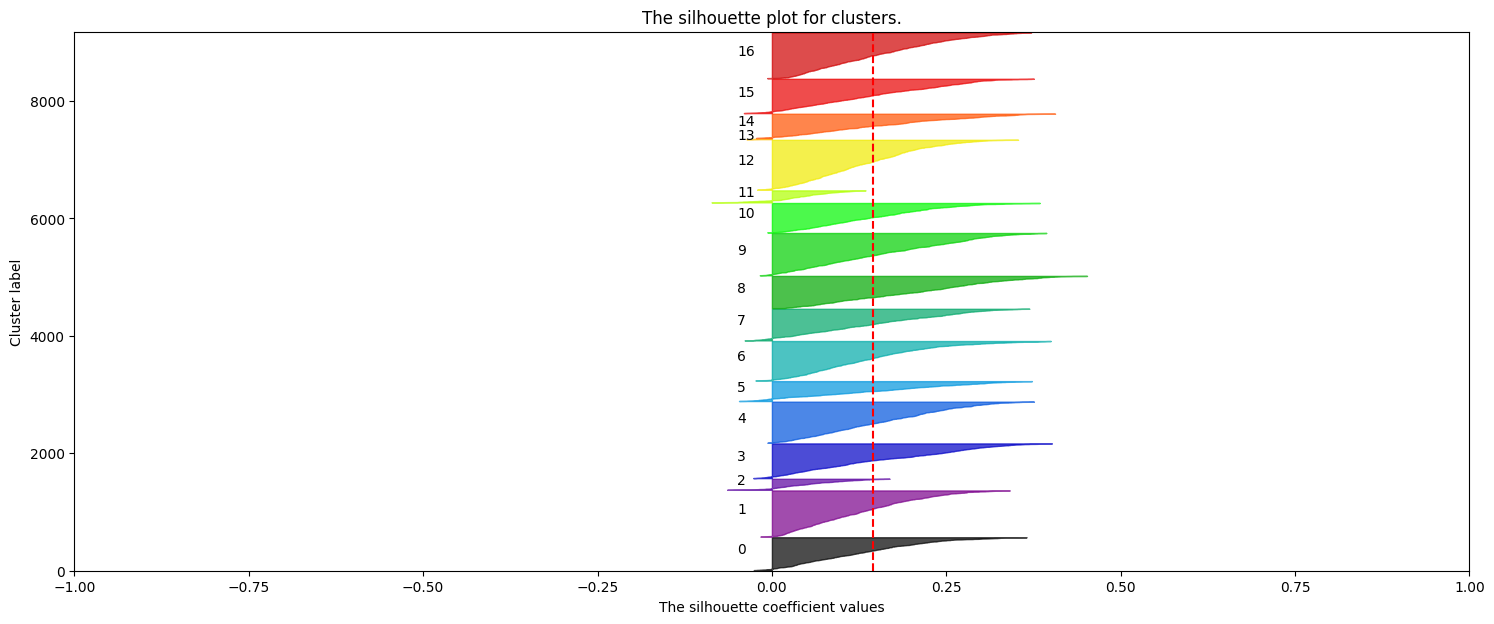

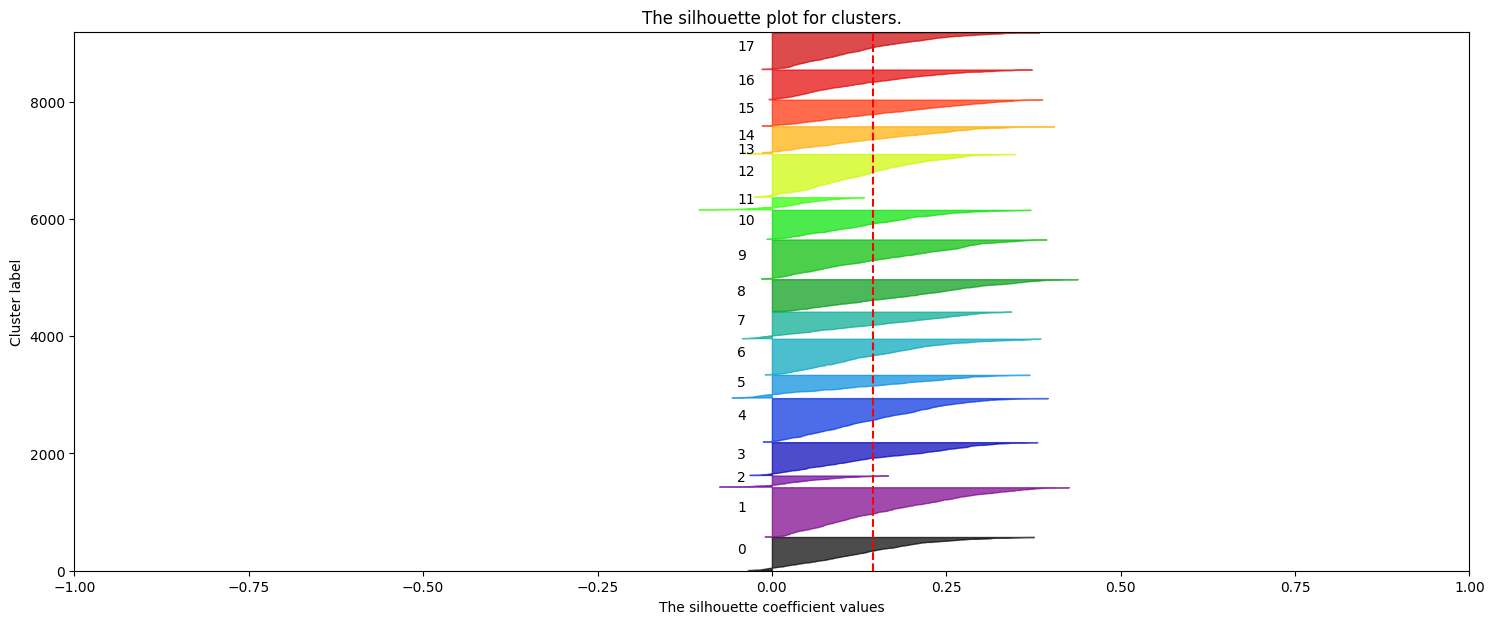

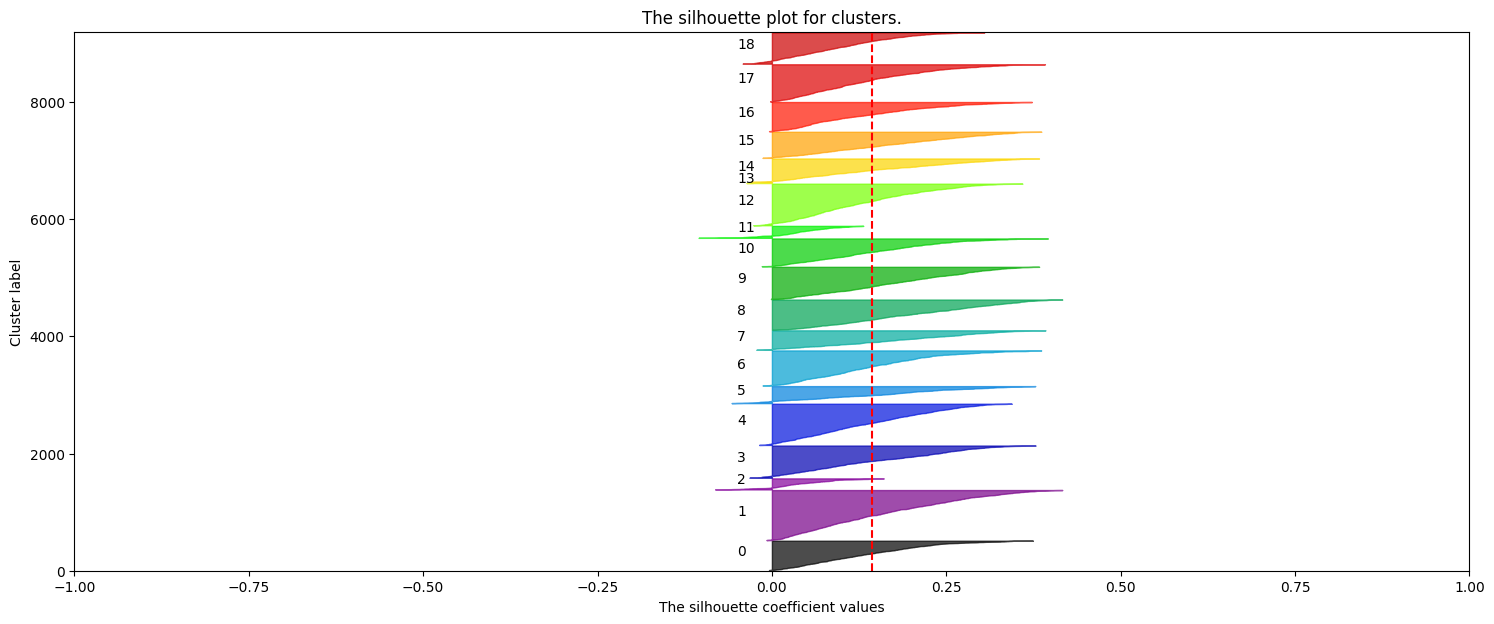

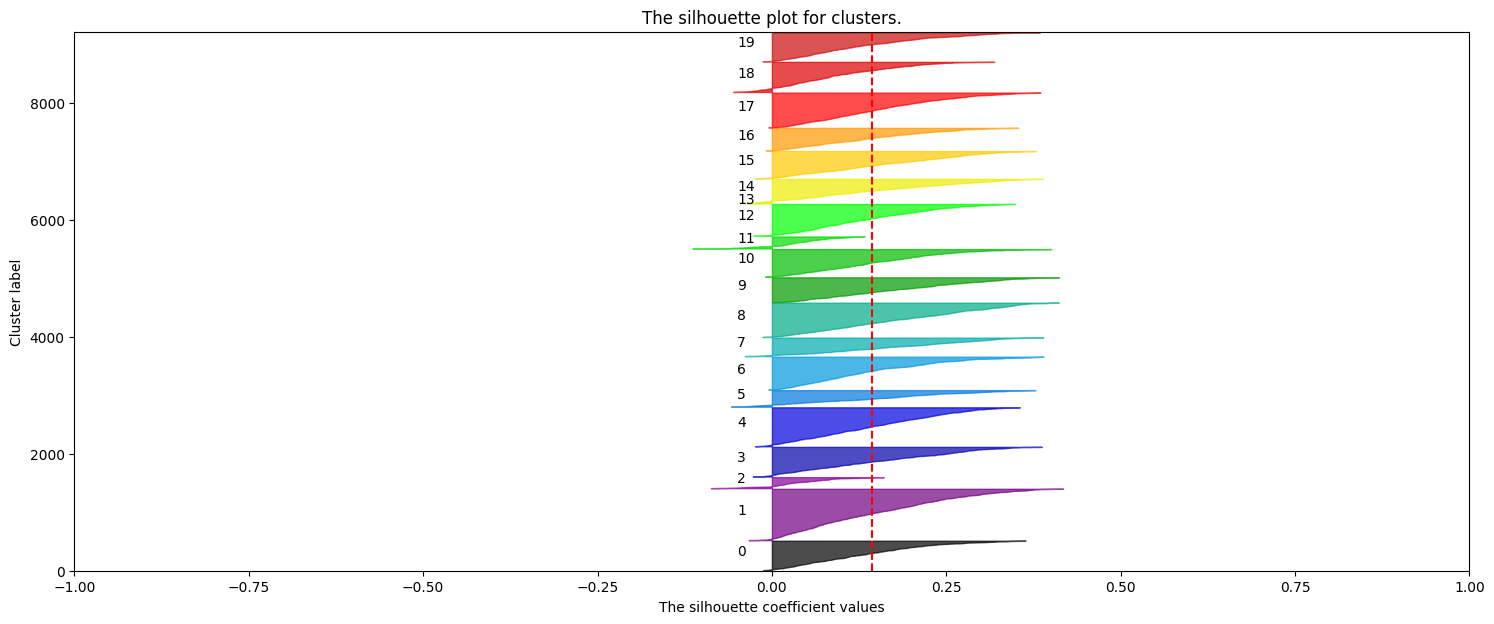

In [ ]:
import matplotlib.cm as cm
#code edited from sklearn documentation
#https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html#sphx-glr-auto-examples-cluster-plot-kmeans-silhouette-analysis-py
range_n_clusters = [2, 3, 4, 5, 6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]

for n_clusters in range_n_clusters:
    
    fig, (ax1) = plt.subplots(1, 1)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(data_matrix) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(data_matrix)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(data_matrix, cluster_labels)
    print(
        "For n_clusters =",
        n_clusters,
        "The average silhouette_score is :",
        silhouette_avg,
    )

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(data_matrix, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")


    

plt.show()

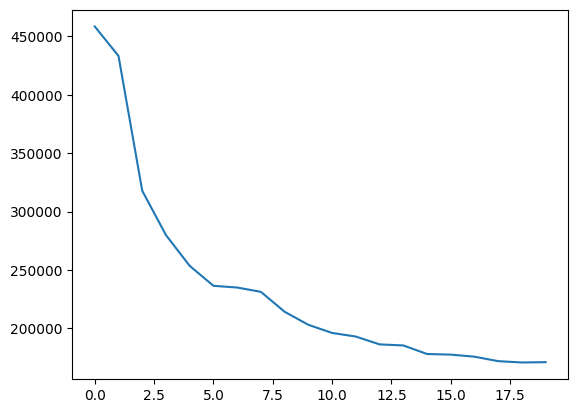

In [ ]:
# function returns WSS score for k values from 1 to kmax
# code adapted from https://medium.com/analytics-vidhya/how-to-determine-the-optimal-k-for-k-means-708505d204eb
def calculate_WSS(points, kmax):
  sse = []
  for k in range(1, kmax+1):
    kmeans = KMeans(n_clusters = k).fit(points)
    centroids = kmeans.cluster_centers_
    pred_clusters = kmeans.predict(points)
    curr_sse = 0
    
    # calculate square of Euclidean distance of each point from its cluster center and add to current WSS
    for i in range(len(points)):
      curr_center = centroids[pred_clusters[i]]
      curr_sse += (points[i, 0] - curr_center[0]) ** 2 + (points[i, 1] - curr_center[1]) ** 2
      
    sse.append(curr_sse)
  return sse

WSS_calculated = calculate_WSS(data_matrix, 20)

plt.figure()
plt.plot(WSS_calculated)
plt.xlabel("number of clusters")
plt.ylabel("WSS")
plt.title("Elbow method for optimal k")

In [16]:
kmeans = KMeans(n_clusters=5, random_state=0).fit(data_matrix)
kmeans.fit(data_matrix)


,n_clusters,5
,init,'k-means++'
,n_init,'auto'
,max_iter,300
,tol,0.0001
,verbose,0
,random_state,0
,copy_x,True
,algorithm,'lloyd'


In [17]:
kmeans.cluster_centers_

array([[-16.18945746,  12.6853872 ,   9.61433116, ..., -13.99233344,
        -36.46417661,  54.50140159],
       [-13.24602585,  14.43328735,   8.71538   , ..., -12.04147782,
        -30.67447207,  48.14556852],
       [-15.20717502,   7.11748256,   8.31803402, ..., -12.22951478,
        -38.69744832,  48.61253262],
       [ -1.18894238,  23.3881224 ,  20.86408357, ...,   0.7268322 ,
        -20.51787849,  60.76692151],
       [-12.22731198,   9.8418265 ,   8.470525  , ..., -10.55235913,
        -30.71145234,  42.87798819]], shape=(5, 54000))

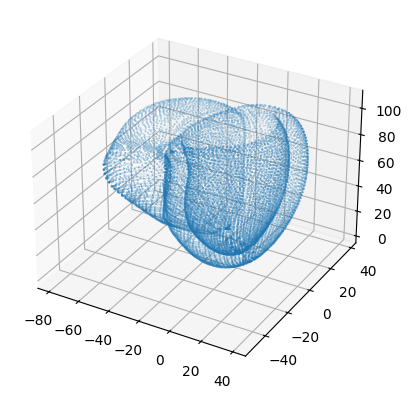

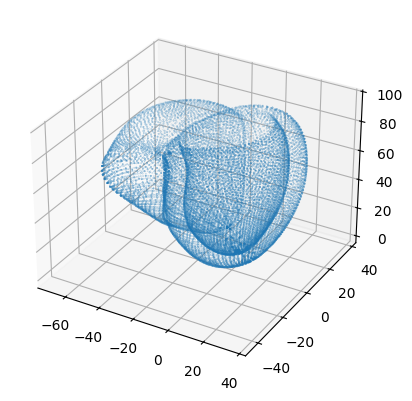

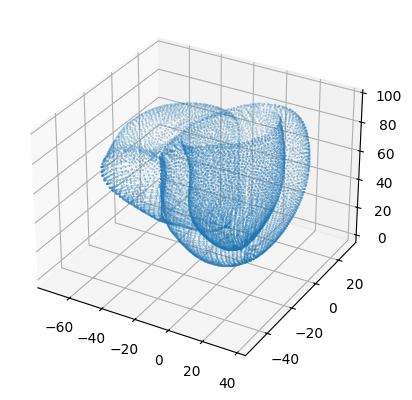

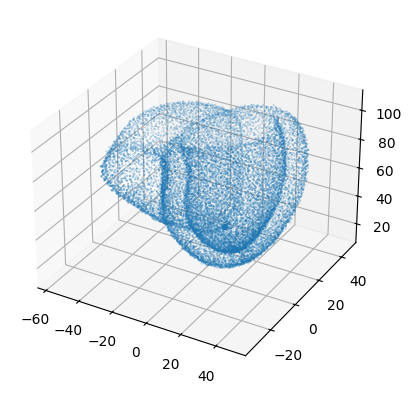

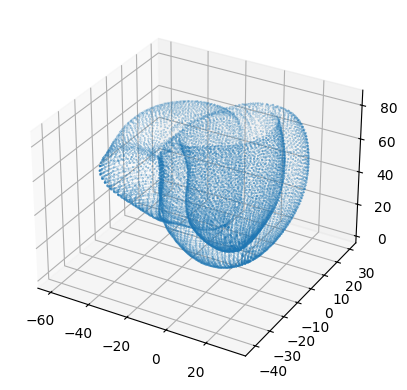

In [ ]:
#plotting the kmeans cluster centres
for i in range(0,5):
    geometry = kmeans.cluster_centers_[i].reshape(1,18000,3)
    fig = plt.figure()
    ax = plt.axes(projection='3d')

    xs = geometry[0,:,0]
    ys = geometry[0,:,1]
    zs = geometry[0,:,2]
    #heart_part = geometry[0,:,3]

    ax.scatter3D(xs,ys,zs, s = 0.05)